In [1]:
#edit1
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf
import statsmodels
import statsmodels.api as sm

In [4]:
#1. read data 
light = pd.read_csv("light1.csv")
light.columns

Index(['id', 'ward', 'accident', 'crimes', 'person', 'density', 'IMD', 'NEET',
       'unemployment', 'light_count'],
      dtype='object')

In [10]:
2. data preprocessing
light_data = light[['crimes','person','density','IMD','NEET','unemployment','light_count']]
light_x = light[['person','density','IMD','NEET','unemployment','light_count']]
light_data.head()

,crimes,person,density,IMD,NEET,unemployment,light_count
0,2753,15239,52,40.882,2.54,3.68,2409
1,5181,24133,60,40.998,0.62,4.84,2880
2,2529,14665,38,46.092,2.36,6.23,2125
3,1897,14737,34,35.162,1.54,5.23,1778
4,2388,17421,66,38.926,2.27,6.05,1639


Text(0.5, 1.0, 'Correlation Matrix')

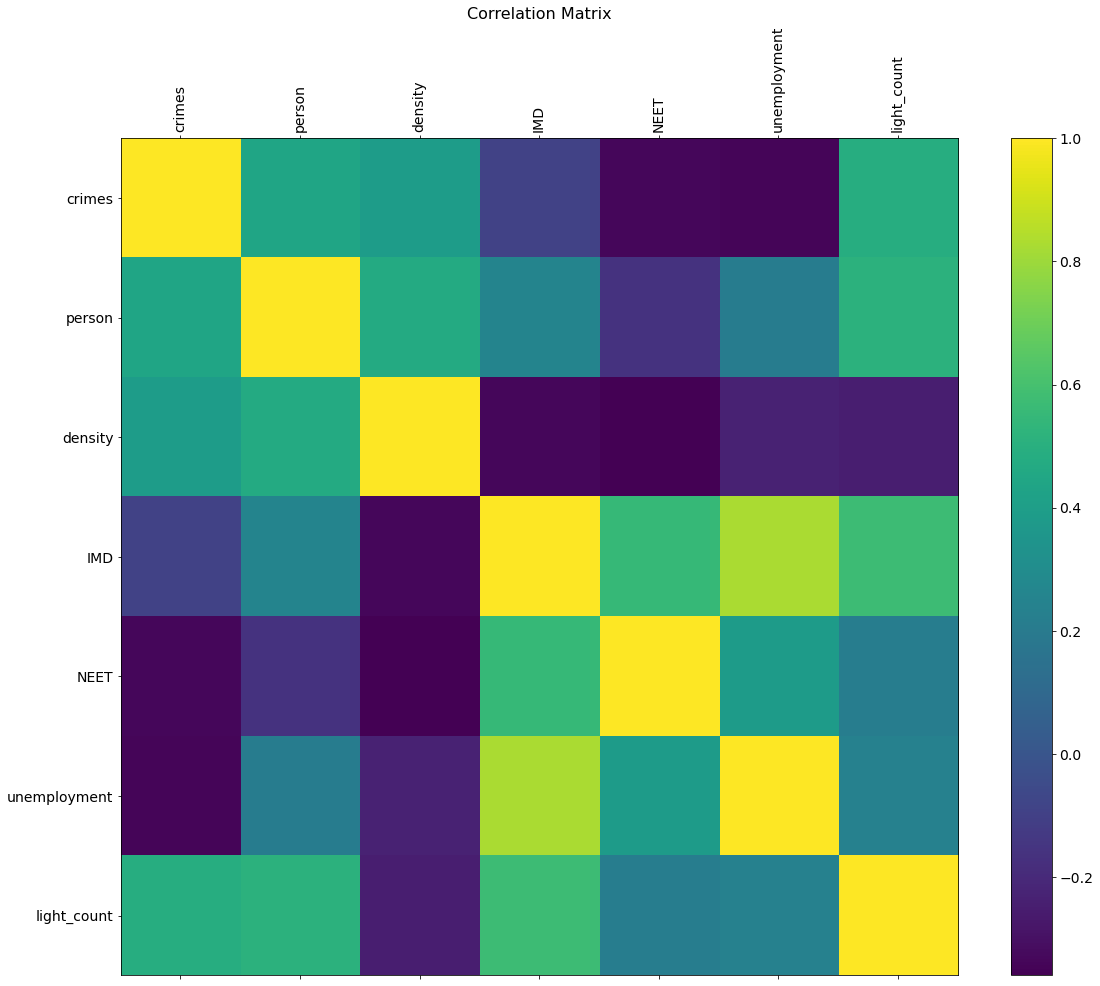

In [11]:
#3. Checking the correlation between variables,Before modelling, 
df = light_data
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [12]:
light_data.corr()

,crimes,person,density,IMD,NEET,unemployment,light_count
crimes,1.000000,0.441793,0.392088,-0.092381,-0.334930,-0.340616,0.486583
person,0.441793,1.000000,0.473473,0.253157,-0.162723,0.213521,0.511526
density,0.392088,0.473473,1.000000,-0.336214,-0.359730,-0.228578,-0.246700
IMD,-0.092381,0.253157,-0.336214,1.000000,0.553461,0.825621,0.574905
NEET,-0.334930,-0.162723,-0.359730,0.553461,1.000000,0.385750,0.218803
unemployment,-0.340616,0.213521,-0.228578,0.825621,0.385750,1.000000,0.239335
light_count,0.486583,0.511526,-0.246700,0.574905,0.218803,0.239335,1.000000


In [13]:
#4.Multiple Linear Regression
regr = sm.formula.ols('crimes ~ person + density + IMD + NEET + unemployment + light_count', light).fit()
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crimes   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     10.99
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           5.31e-06
Time:                        18:24:21   Log-Likelihood:                -282.93
No. Observations:                  32   AIC:                             579.9
Df Residuals:                      25   BIC:                             590.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -888.9091   2521.375     -0.353      0.727   -6081.778    4303.960
person          -0.3349      0.240     -1.394      0.175      -0.829       0.160
density         76.4050     21.759      3.511      0.002      31.591     121.219
IMD             48.0734     82.533      0.582      0.565    -121.907     218.053
NEET         -1039.3389    476.751     -2.180      0.039   -2021.226     -57.452
unemployment  -499.3439    321.285     -1.554      0.133   -1161.042     162.355
light_count      4.3880      1.120      3.920      0.001       2.082       6.694
==============================================================================
Omnibus:                        0.984   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                0.303
Skew:                           0.199   Prob(JB):                        0.859
Kurtosis:                       3.262   Cond. No.                     1.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
#5. we do the Hypothesis Testing and p-values
#through analyzing the Correlation between independet variables and dependent variables 
#we found that the correlation coefficient between them are  close to 0, 
#so our real assumption N1: 
#there is no linear relationship between the independent variables person,density,IMD,NEET,unemployment,light_countand and the dependent variable crimes
#N0: there is a linear relationship between the dependent variables and dependent variables.
regr.pvalues
# we got p > a--- reject N0--- threfore, there is a linear relationship between the dependent variables and dependent varibales

Intercept       0.727381
person          0.175450
density         0.001716
IMD             0.565464
NEET            0.038879
unemployment    0.132704
light_count     0.000609
dtype: float64

In [16]:
#6. analyze the multicollinearity of the independent variables
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [17]:
#using VIF on light_x dataset
light_new = drop_column_using_vif_(light_x)

Dropping: IMD


In [18]:
light_new

,person,density,NEET,unemployment,light_count
0,15239,52,2.54,3.68,2409
1,24133,60,0.62,4.84,2880
2,14665,38,2.36,6.23,2125
3,14737,34,1.54,5.23,1778
4,17421,66,2.27,6.05,1639
5,16237,42,2.13,6.85,1943
6,20557,61,0.60,7.01,2549
7,16848,34,1.17,4.95,1882
8,13017,52,0.92,3.16,1039
9,18320,37,1.14,9.65,2650


In [19]:
#7. do multi-linear regression again  using VIF on light_x dataset
crimes_model = sm.OLS(endog=light[['crimes']], exog=sm.add_constant(light_new)).fit()
crimes_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crimes   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     13.47
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           1.57e-06
Time:                        18:47:52   Log-Likelihood:                -283.14
No. Observations:                  32   AIC:                             578.3
Df Residuals:                      26   BIC:                             587.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -582.0494   2434.192     -0.239      0.813   -5585.602    4421.503
person          -0.3564      0.234     -1.522      0.140      -0.838       0.125
density         77.4107     21.413      3.615      0.001      33.395     121.426
NEET          -921.2438    425.974     -2.163      0.040   -1796.845     -45.642
unemployment  -340.9904    169.025     -2.017      0.054    -688.426       6.445
light_count      4.7866      0.875      5.473      0.000       2.989       6.585
==============================================================================
Omnibus:                        1.264   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.531   Jarque-Bera (JB):                0.488
Skew:                           0.263   Prob(JB):                        0.784
Kurtosis:                       3.298   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

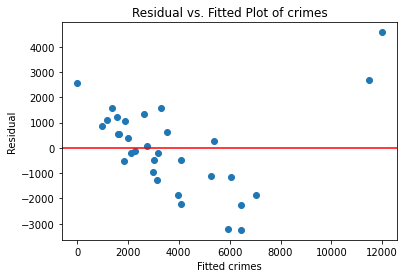

In [21]:
# 8. use residual analyses to verify Necessary Conditions (LINE)
plt.scatter(crimes_model.fittedvalues, crimes_model.resid)
# adding title and labels
plt.xlabel('Fitted crimes')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of crimes')
plt.axhline(y = 0, color = 'r',linestyle = '-')
plt.show()

In [97]:
crimes_model.resid.mean()

-7.688072400924284e-12